In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets, models, samplers
from localization.utils import ipr, entropy, build_DRT
from localization.experiments.multiple_targets import progression
from localization.experiments import simulate, simulate_or_load, make_key
from localization.utils import plot_receptive_fields, plot_rf_evolution, build_gaussian_covariance, build_non_gaussian_covariance, entropy_sort, build_DRT

In [22]:
# Define config
config = dict(
    seed=0,
    num_dimensions=40,
    # num_hiddens=60,
    num_hiddens=1,
    gain=3,
    init_scale=0.1,#0.01,
    activation='relu',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,
    # use_bias=True,
    optimizer_fn=optax.sgd,
    learning_rate=0.3,#3.0,
    batch_size=1000,
    num_epochs=5000,
    dataset_cls=datasets.NonlinearGPCountDataset,
    # xi=(3,2,1,0.5,0.2,0.1,),
    xi=(3,),
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=10,
)
DRT = build_DRT(40)

File NonlinearGPCountDataset[-1.00,01.00]_xi=03.00,02.00,01.00,00.50,00.20,00.10_gain=3.000_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=0.300_SimpleNet_L=040_K=001_activation=relu_init_scale=0.100_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp_count.NonlinearGPCountDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 3,
 'init_fn': <function xavier_normal_init at 0x141110e00>,
 'init_scale': 0.1,
 'kwargs': {},
 'learning_rate': 0.3,
 'loss_fn': 'mse',
 'marginal_adjust': <function <lambda> at 0x1514816c0>,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 1,
 'num_ste

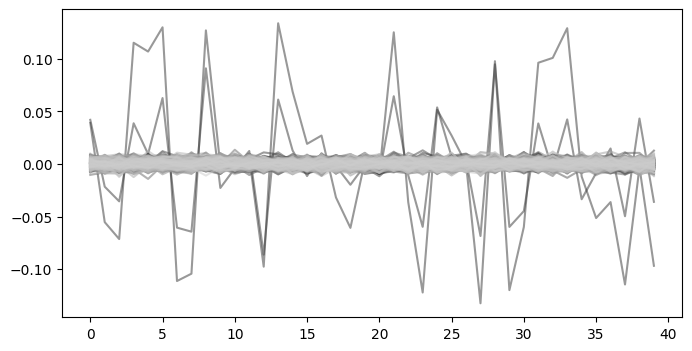

In [23]:
weights_nlgp, metrics_nlgp = simulate_or_load(**config)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))

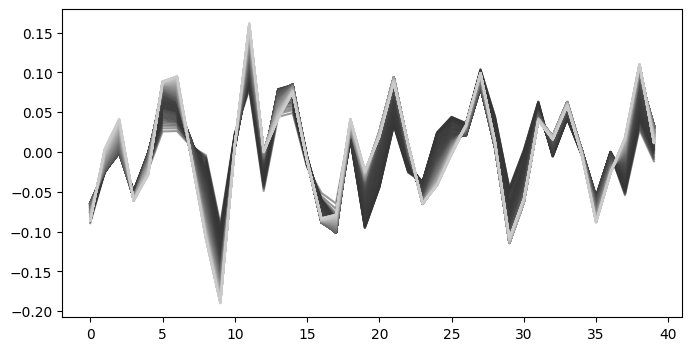

In [17]:
_ = plot_rf_evolution(weights_nlgp[:,1:2], figsize=(8, 4))

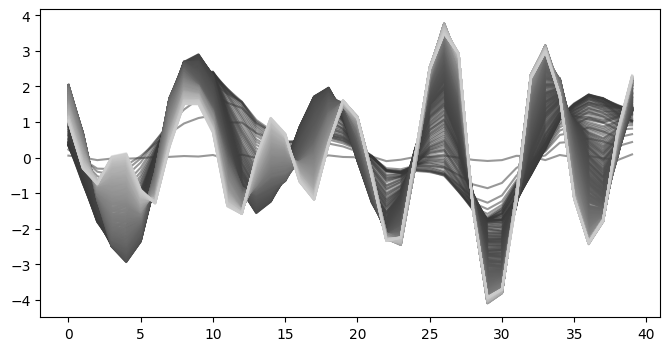

In [4]:
_ = plot_rf_evolution(weights_nlgp[:,2:3], figsize=(8, 4))

### Gaussian

In [5]:
# Define config
config = dict(
    seed=0,
    num_dimensions=40,
    num_hiddens=60,
    gain=0.01,
    init_scale=0.1,#0.01,
    activation='relu',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,
    optimizer_fn=optax.sgd,
    learning_rate=3.0,
    batch_size=1000,
    num_epochs=5000,
    dataset_cls=datasets.NonlinearGPCountDataset,
    xi=3,
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=10,
)

Already simulated


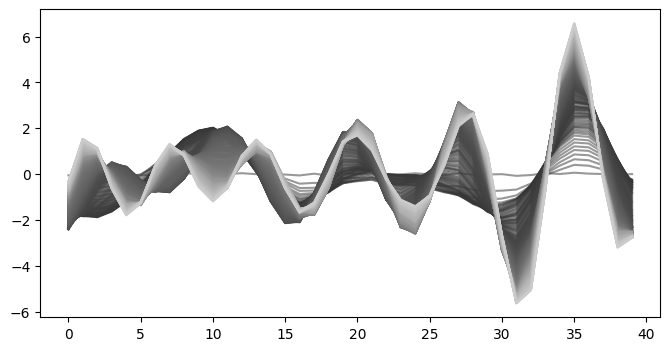

In [6]:
weights_nlgp, metrics_nlgp = simulate_or_load(**config)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))

# Highest gain

In [7]:
def conv_x_across_w(x, w):
    n = x.shape[-1]
    out = jnp.zeros((n,))
    for i in range(n):
        out = out.at[i].set(jnp.sum(x * jnp.roll(w, i)))
    return out

In [8]:
# Define config
config = dict(
    seed=0,
    num_dimensions=40,
    num_hiddens=1,
    gain=100,
    # gain=0.01,
    init_scale=0.01,#0.01,
    activation='relu',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,
    optimizer_fn=optax.sgd,
    learning_rate=0.3,#3.0,
    batch_size=1000,
    num_epochs=1000,
    dataset_cls=datasets.NonlinearGPCountDataset,
    # xi=(5, 4, 0.3, 0.2, 0.1,),
    # xi=(5, 4, 3, 2, 1,),
    # xi=(5, 4,),
    xi=(2, 1,),
    # xi=(0.5, 0.4,),
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=10,
)

dataset = datasets.NonlinearGPCountDataset(key=jax.random.PRNGKey(0), **config)
x, y = dataset[:1]
x_ = x[0]

Already simulated


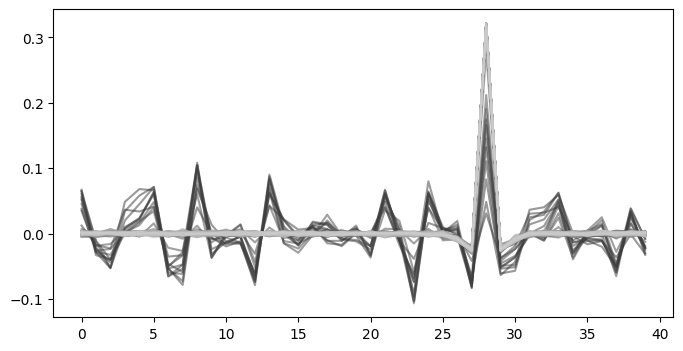

In [9]:
weights_nlgp, metrics_nlgp = simulate_or_load(**config)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))

In [10]:
# x_ = (x[0] + 1) / 2
x_ = jnp.zeros(40); x_ = x_.at[17:23].set(1)
x_ = 2 * x_ - 1

-7.7211685 1.523108


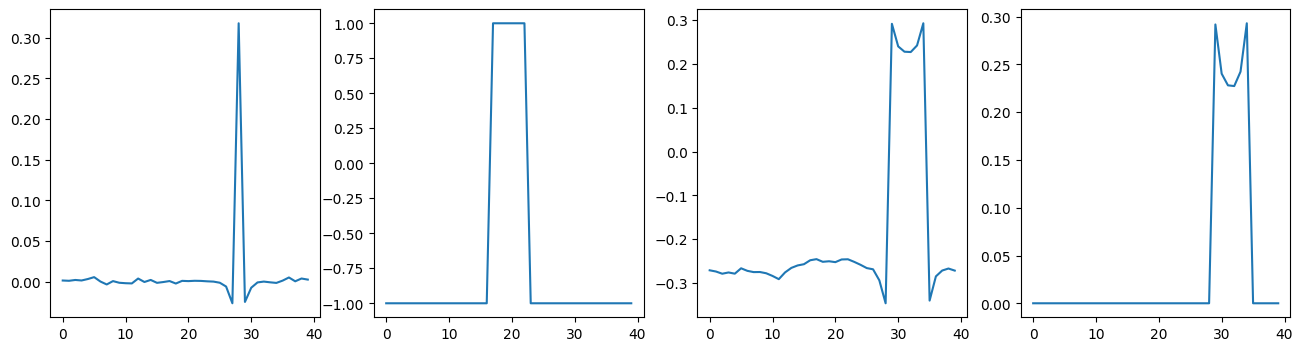

In [11]:
w = weights_nlgp[-1, 0]
c = conv_x_across_w(x_, w)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.plot(w)
ax2.plot(x_)
ax3.plot(c)
ax4.plot(jnp.maximum(0, c))
print(c.sum(), jnp.maximum(0, c).sum())

-6.198883e-06 5.6162376


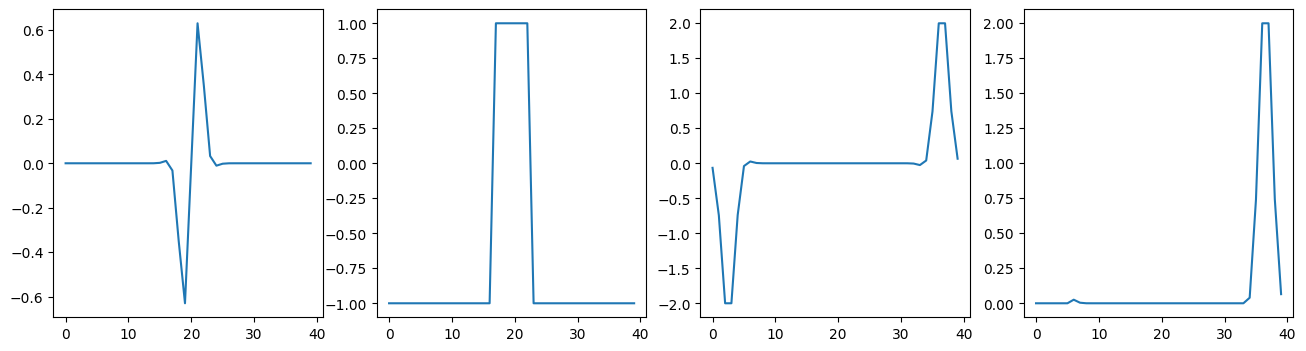

In [12]:
g = jnp.arange(40) / 40
w = jnp.sin(2*jnp.pi * g * 6) * jnp.exp( -((g-0.5)/0.05)**2 )
c = conv_x_across_w(x_, w)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.plot(w)
ax2.plot(x_)
ax3.plot(c)
ax4.plot(jnp.maximum(0, c))
print(c.sum(), jnp.maximum(0, c).sum())

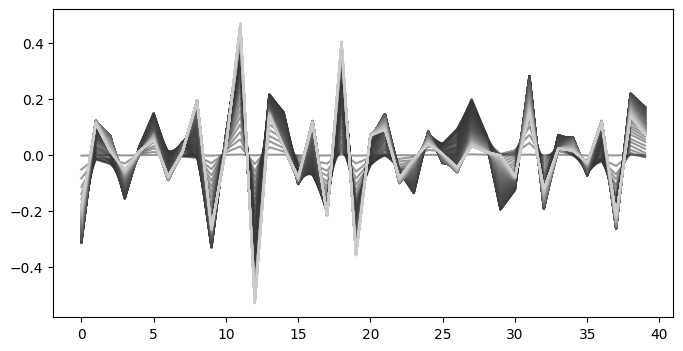

In [6]:
_ = plot_rf_evolution(weights_nlgp[:,1:2], figsize=(8, 4))

### Sine initialization

In [50]:
def sine_init(
    weight,
    key,
    scale: float = 1.0,
):
    K, n = weight.shape
    g = jnp.arange(n) / n
    w = jnp.sin(2*jnp.pi * g * 6) * jnp.exp( -((g-0.5)/0.05)**2 ) 
    W = jnp.stack([ jnp.roll(w, n//2+i) for i in range(K) ], axis=0)
    return W

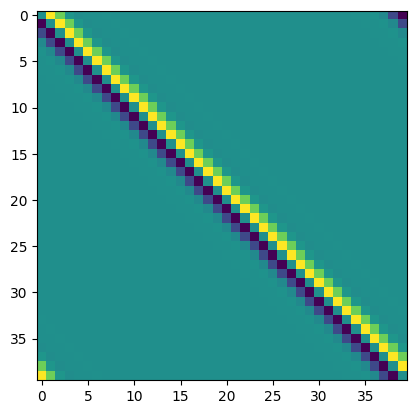

In [51]:
_ = plt.imshow( sine_init(jnp.zeros((40, 40)), key=0) )

In [52]:
# Define config
config = dict(
    seed=0,
    num_dimensions=40,
    # num_hiddens=60,
    num_hiddens=1,
    gain=3,
    init_scale=0.1,#0.01,
    activation='relu',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,
    # use_bias=True,
    optimizer_fn=optax.sgd,
    learning_rate=0.3,#3.0,
    batch_size=1000,
    num_epochs=5000,
    dataset_cls=datasets.NonlinearGPCountDataset,
    # xi=(3,2,1,0.5,0.2,0.1,),
    xi=(3,),
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=sine_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=10,
)

In [56]:
weights_nlgp, metrics_nlgp = simulate_or_load(**config)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))

File NonlinearGPCountDataset[-1.00,01.00]_xi=03.00_gain=3.000_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=0.300_SimpleNetnobias_L=040_K=060_activation=relu_init_scale=0.100_sine_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp_count.NonlinearGPCountDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 3,
 'init_fn': <function sine_init at 0x155f16160>,
 'init_scale': 0.1,
 'kwargs': {},
 'learning_rate': 0.3,
 'loss_fn': 'mse',
 'marginal_adjust': <function <lambda> at 0x1514816c0>,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 60,
 'num_steps': 1000,
 'optimizer_fn': <function sgd

KeyboardInterrupt: 

In [63]:
# Define config
config = dict(
    seed=0,
    num_dimensions=40,
    num_hiddens=60,
    gain=3,
    init_scale=0.1,#0.01,
    activation='relu',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,
    # use_bias=True,
    optimizer_fn=optax.sgd,
    learning_rate=0.3,#3.0,
    batch_size=1000,
    num_epochs=5000,
    dataset_cls=datasets.NonlinearGPCountDataset,
    # xi=(3,2,1,0.5,0.2,0.1,),
    xi=(3,1,0.5,),
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=sine_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=10,
)

File NonlinearGPCountDataset[-1.00,01.00]_xi=03.00,01.00,00.50_gain=3.000_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=0.300_SimpleNetnobias_L=040_K=060_activation=relu_init_scale=0.100_sine_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp_count.NonlinearGPCountDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 3,
 'init_fn': <function sine_init at 0x155f16160>,
 'init_scale': 0.1,
 'kwargs': {},
 'learning_rate': 0.3,
 'loss_fn': 'mse',
 'marginal_adjust': <function <lambda> at 0x1514816c0>,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 60,
 'num_steps': 1000,
 'optimizer_fn': <

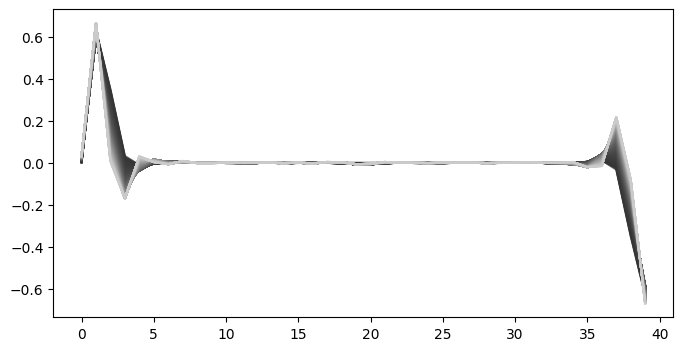

In [64]:
weights_nlgp, metrics_nlgp = simulate_or_load(**config)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))

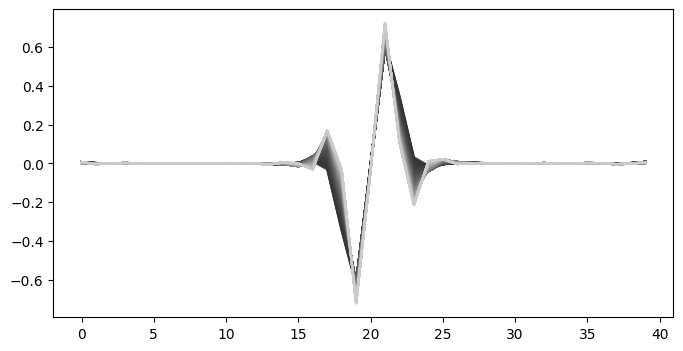

In [65]:
_ = plot_rf_evolution(weights_nlgp[:,20:21], figsize=(8, 4))

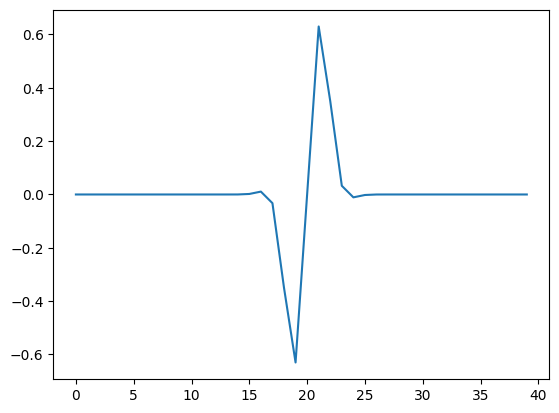

In [66]:
_ = plt.plot(sine_init(jnp.zeros((60, 40)), key=0)[20])

### Large initialization

In [79]:
# Define config
config = dict(
    seed=0,
    num_dimensions=40,
    num_hiddens=1,
    gain=100,
    init_scale=100.,#0.1,#0.01,
    activation='relu',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,
    optimizer_fn=optax.sgd,
    learning_rate=0.3,
    batch_size=1000,
    num_epochs=5000,
    dataset_cls=datasets.NonlinearGPCountDataset,
    xi=(3,),
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=10,
)

File NonlinearGPCountDataset[-1.00,01.00]_xi=03.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=0.300_SimpleNetnobias_L=040_K=001_activation=relu_init_scale=100.000_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp_count.NonlinearGPCountDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 100,
 'init_fn': <function xavier_normal_init at 0x141110e00>,
 'init_scale': 100.0,
 'kwargs': {},
 'learning_rate': 0.3,
 'loss_fn': 'mse',
 'marginal_adjust': <function <lambda> at 0x1514816c0>,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 1,
 'num_steps': 1000,
 'opt

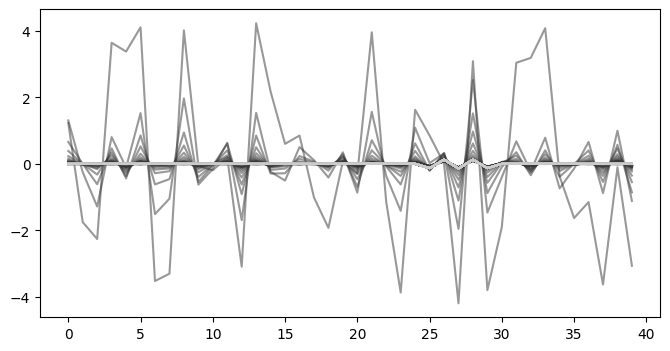

In [80]:
weights_nlgp, metrics_nlgp = simulate_or_load(**config)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))

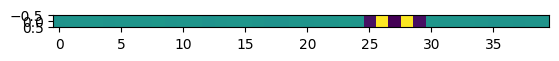

In [81]:
_ = plt.imshow(weights_nlgp[-1])

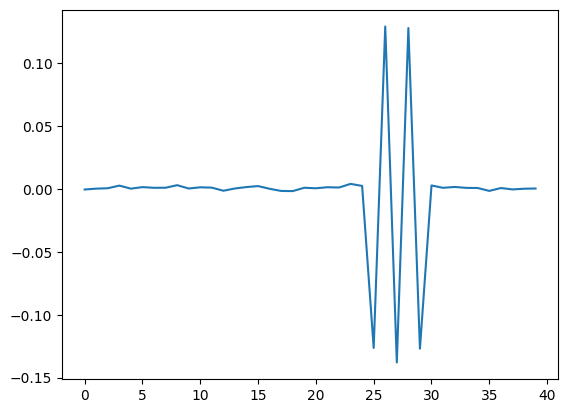

In [82]:
_ = plt.plot(weights_nlgp[-1,0])

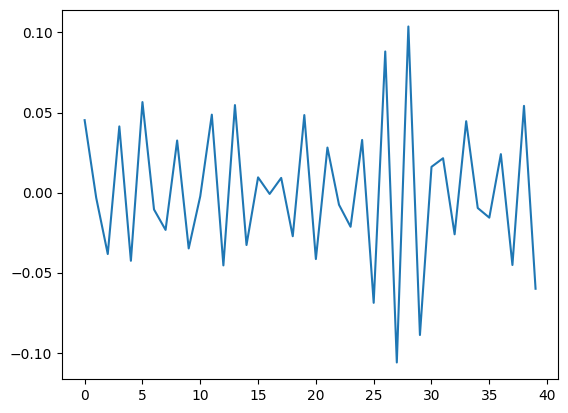

In [89]:
_ = plt.plot(weights_nlgp[25,0])

### Small initialization

In [90]:
# Define config
config = dict(
    seed=0,
    num_dimensions=40,
    num_hiddens=1,
    gain=100,
    init_scale=0.01,
    activation='relu',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,
    optimizer_fn=optax.sgd,
    learning_rate=0.3,
    batch_size=1000,
    num_epochs=5000,
    dataset_cls=datasets.NonlinearGPCountDataset,
    xi=(3,),
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=10,
)

File NonlinearGPCountDataset[-1.00,01.00]_xi=03.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=0.300_SimpleNetnobias_L=040_K=001_activation=relu_init_scale=0.010_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp_count.NonlinearGPCountDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 100,
 'init_fn': <function xavier_normal_init at 0x141110e00>,
 'init_scale': 0.01,
 'kwargs': {},
 'learning_rate': 0.3,
 'loss_fn': 'mse',
 'marginal_adjust': <function <lambda> at 0x1514816c0>,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 5000,
 'num_hiddens': 1,
 'num_steps': 1000,
 'optimi

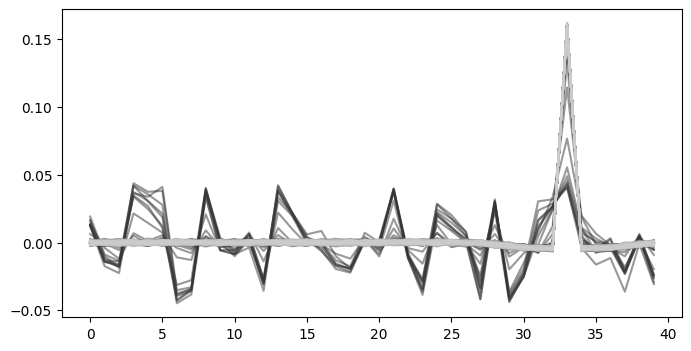

In [91]:
weights_nlgp, metrics_nlgp = simulate_or_load(**config)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))

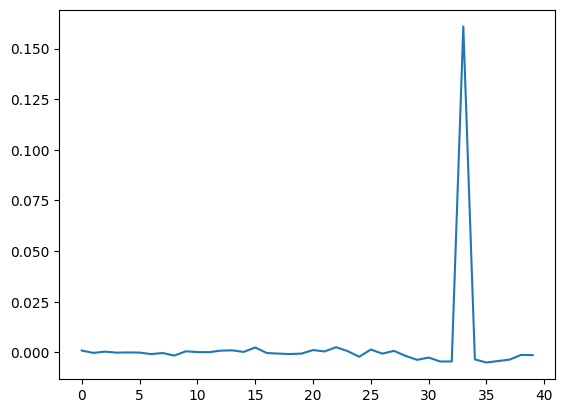

In [92]:
_ = plt.plot(weights_nlgp[-1,0])